## **Transferring folders with images from Google Drive to Google Colab**

In [ ]:
zip_path = '/content/drive/MyDrive/Colab_Notebooks/diploma_project/pneumonia_data.zip'
!cp "{zip_path}" .
!unzip -q pneumonia_data.zip
!rm pneumonia_data.zip

## **Loading images from folders**

In [ ]:
import numpy as np
import cv2 
import os
import time 
from keras.preprocessing.image import load_img


def fotos_to_array(path):
  image_set = []
  checker = 0
  t = time.process_time()
  for filename in os.listdir(path):
    checker = checker + 1
    if(checker%400==0):
      print(checker," fotos preprocessed.")
      elapsed_time = time.process_time() - t
      t = time.process_time()
      print(elapsed_time)
    image_set.append(np.asarray(load_img(path + filename, target_size=(224, 224), color_mode='grayscale')))
  return np.array(image_set)


def dir_to_array(path):
  image_set = []
  for filename in os.listdir(path):
    image_set.append(cv2.imread(path+'/'+filename, 0))
  return np.array(image_set)


In [ ]:
train_data_NORMAL = fotos_to_array('/content/train/NORMAL/')
test_data_NORMAL = fotos_to_array('/content/test/NORMAL/')
valid_data_NORMAL = fotos_to_array('/content/val/NORMAL/')

y_train_NORMAL = np.zeros((train_data_NORMAL.shape[0], 1))
y_test_NORMAL = np.zeros((test_data_NORMAL.shape[0], 1))
y_valid_NORMAL = np.zeros((valid_data_NORMAL.shape[0], 1))

train_data_PNEUMONIA = fotos_to_array('/content/train/PNEUMONIA/')
test_data_PNEUMONIA = fotos_to_array('/content/test/PNEUMONIA/')
valid_data_PNEUMONIA = fotos_to_array('/content/val/PNEUMONIA/')

y_train_PNEUMONIA = np.ones((train_data_PNEUMONIA.shape[0], 1))
y_test_PNEUMONIA = np.ones((test_data_PNEUMONIA.shape[0], 1))
y_valid_PNEUMONIA = np.ones((valid_data_PNEUMONIA.shape[0], 1))

X = np.concatenate((train_data_NORMAL, test_data_NORMAL, valid_data_NORMAL, train_data_PNEUMONIA, test_data_PNEUMONIA, valid_data_PNEUMONIA), axis = 0)
y = np.concatenate((y_train_NORMAL, y_test_NORMAL, y_valid_NORMAL, y_train_PNEUMONIA, y_test_PNEUMONIA, y_valid_PNEUMONIA), axis = 0)

400  fotos preprocessed.
7.067991199
800  fotos preprocessed.
7.303702418
1200  fotos preprocessed.
7.179741383
400  fotos preprocessed.
2.062008892999998
800  fotos preprocessed.
2.184424480000004
1200  fotos preprocessed.
2.0939066389999965
1600  fotos preprocessed.
2.142165607999999
2000  fotos preprocessed.
2.0852305259999966
2400  fotos preprocessed.
2.0603389580000027
2800  fotos preprocessed.
2.2080891559999998
3200  fotos preprocessed.
2.101737331999999
3600  fotos preprocessed.
2.197071963000006


In [ ]:
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)
flat_list = [int(item) for sublist in y for item in sublist]
print(X.shape)
print(y.shape)

(5856, 224, 224, 1)
(5856, 1)


# **Plotting images and number of cases in each category**

Number of Class:  2
-------------------------------------------------------Normal-------------------------------------------------------


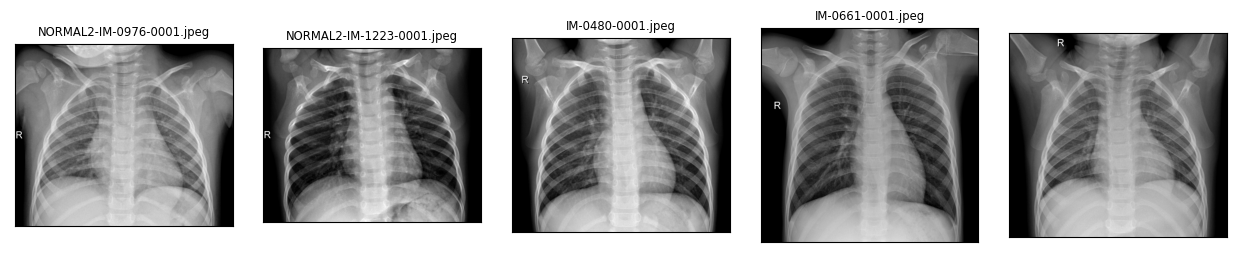


-------------------------------------------------------Pneumonia-------------------------------------------------------


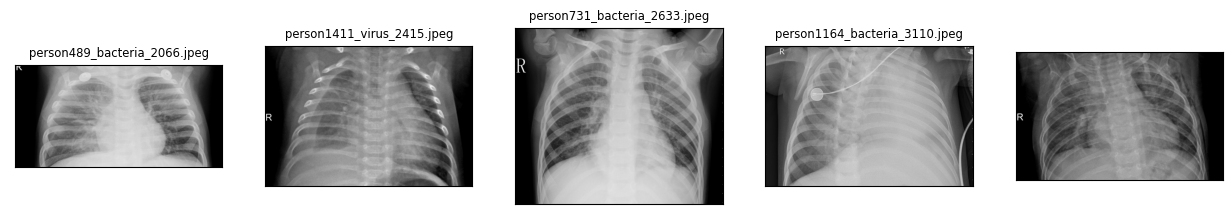


-------------------------------------------------------All Class Printed:2-------------------------------------------------------


In [ ]:
import random 
import re 
import matplotlib.pyplot as plt


def select_image_by_category(image_dir, image_count_per_category):
    classes = os.listdir(image_dir)
    class_count = len(classes)

    image_file_paths = {}
    
    for i in range(class_count):
        subdir_path = image_dir+"/"+classes[i]
        subdir_files = os.listdir(subdir_path)

        subdir_file_count = len(subdir_files)

        subdir_file_mem = {}
        
        subdir_file_index = -1
        
        image_file_paths[classes[i]] = []
        
        for j in range(image_count_per_category):
            while subdir_file_index in subdir_file_mem:
                subdir_file_index = random.randint(0, subdir_file_count-1)
                
            subdir_file_mem[subdir_file_index] = 1
            
            subdir_file_name = subdir_files[subdir_file_index]
            subdir_file_path = subdir_path+ "/" + subdir_file_name

            image_file_paths[classes[i]].append(subdir_file_path)
            
    return image_file_paths

def get_reset_subplot_params(nrows, ncols, dpi):
    subplot_params = {}
    subplot_params["nrows"] = nrows
    subplot_params["ncols"] = ncols

    subplot_params["figsize_col"] = subplot_params["ncols"]*2.5
    subplot_params["figsize_row"] = subplot_params["nrows"]*2.5
    subplot_params["dpi"] = dpi
    subplot_params["facecolor"] = 'w'
    subplot_params["edgecolor"] = 'k'
    subplot_params["subplot_kw"] = {'xticks': [], 'yticks': []}
    subplot_params["axes.titlesize"] = 'small'
    subplot_params["hspace"] = 0.5
    subplot_params["wspace"] = 0.3
    
    return subplot_params

def get_reset_plot_params(figsize=(15, 5), title="", xlabel ="", ylabel="", legends=[], title_fontsize = 18, label_fontsize = 14, image_file_name="", save = False, dpi=100, update_image=True):
    plot_params = {}
    
    plot_params["figsize"] = figsize
    
    plot_params["title"] = title
    
    plot_params["xlabel"] = xlabel
    plot_params["ylabel"] = ylabel
    
    plot_params["legends"] = legends 
    
    plot_params["title_fontsize"] = title_fontsize
    plot_params["axes.titlesize"] = "small"
    plot_params["label_fontsize"] = label_fontsize
    
    plot_params["image_file_name"] = image_file_name
    plot_params["save"] = save
    plot_params["update_image"] = update_image
    
    plot_params["subplot"] = None
    return plot_params

def name_correct(name):
    return re.sub(r'[^a-zA-Z,:]', ' ', name).title()


def get_fig_axs(subplot_params):
    fig, axs = plt.subplots(
        nrows=subplot_params["nrows"], ncols=subplot_params["ncols"], 
        figsize=(subplot_params["figsize_col"], subplot_params["figsize_row"]),
        dpi=subplot_params["dpi"], facecolor=subplot_params["facecolor"], 
        edgecolor=subplot_params["edgecolor"], subplot_kw=subplot_params["subplot_kw"])
        
    return fig, axs
    
def plot_sample_image(image_file_paths, plot_params, subplot_params, update_image=True):
    fig, axs = get_fig_axs(subplot_params)

    plt.rcParams.update({'axes.titlesize': plot_params["axes.titlesize"]})
    plt.subplots_adjust(hspace=subplot_params["hspace"], wspace=subplot_params["wspace"])


    i=0
    for img_filepath in image_file_paths:
        img = cv2.imread(img_filepath, 1)
        plt.title(img_filepath.split("/")[-1])
        plt.subplot(subplot_params["nrows"], subplot_params["ncols"], i+1)
        plt.imshow(img)
        
        plt.xticks([])
        plt.yticks([])
        
        i=i+1
        
    if plot_params["update_image"] and os.path.exists(plot_params["image_file_name"]):
        os.remove(plot_params["image_file_name"])  
    if plot_params["save"]:
        fig.savefig(plot_params["image_file_name"], dpi=plot_params["dpi"])
        
    plt.tight_layout()
    plt.show()


def show_class_sample_images(directory, image_count_per_category=5, save=False, dpi=100, update_image=False):
    class_count = len(os.listdir(directory))
    print("Number of Class: ", class_count)
    sample_img_by_class = select_image_by_category(directory, image_count_per_category)
    for class_name in sample_img_by_class:
        plot_params = get_reset_plot_params(image_file_name="img.png", save = save, dpi=dpi, update_image=update_image)
        subplot_params = get_reset_subplot_params(nrows=1, ncols=image_count_per_category, dpi=dpi)
        print("%s%s%s"%("-"*55, name_correct(class_name), "-"*55))
        plot_sample_image(sample_img_by_class[class_name], plot_params, subplot_params)
        print("")
    print("%s%s%d%s"%("-"*55, "All Class Printed:", class_count, "-"*55))
training_dirr = '/content/train/'
show_class_sample_images(training_dirr, image_count_per_category=5, save=False, dpi=100, update_image=False)

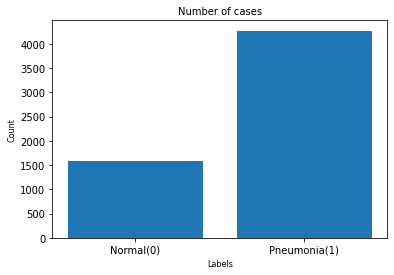

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns


def plot_cases(y):

      # Get the counts for each class
      cases_count = Counter(y).values()
      y_pos = np.arange(len(cases_count))
      # Plot the results 
      plt.bar(y_pos, cases_count)
      plt.title('Number of cases', fontsize=10)
      plt.xlabel('Labels', fontsize=8)
      plt.ylabel('Count', fontsize=8)
      plt.xticks(range(len(cases_count)), ['Normal(0)', 'Pneumonia(1)'])
      plt.show()

plot_cases(flat_list)


# **Preprocessing steps**

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

def tensor_split(X, y, r_s=322, test_size=0.25):
    split = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=r_s) # перемешивает и делит на тест+ валид + трейн
    for train_index, test_index in split.split(X,y):
        valid_size = int(len(train_index)*0.08)
        X_train, X_valid, X_test = X[train_index][valid_size:], X[train_index][:valid_size], X[test_index]
        y_train, y_valid, y_test = y[train_index][valid_size:], y[train_index][:valid_size], y[test_index]
    return X_train, X_valid, X_test, y_train, y_valid, y_test

X = X/255
X_train, X_valid, X_test, y_train, y_valid, y_test = tensor_split(X, y)

In [ ]:
print(X_train.shape )
print(X_test.shape)
print(X_valid.shape)

(4041, 224, 224, 1)
(1464, 224, 224, 1)
(351, 224, 224, 1)


In [ ]:
from keras.utils import np_utils 
y_train = np_utils.to_categorical(y_train, num_classes=2)
y_test = np_utils.to_categorical(y_test, num_classes=2)
y_valid = np_utils.to_categorical(y_valid, num_classes=2)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout


def create_model():
    model = Sequential()
    model.add(Conv2D(16, (3, 3), activation='relu', padding="same", input_shape=(224,224,1)))
    model.add(Conv2D(16, (3, 3), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(224,224,1)))
    model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
    model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(96, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
    model.add(Conv2D(96, (3, 3), padding="valid", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
    model.add(Conv2D(128, (3, 3), padding="valid", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(2 , activation='softmax'))


    print(model.summary())
    
    return model
model = create_model()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 16)      2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 64)        1

In [ ]:
len(X_train)

4041

In [ ]:
from keras import optimizers

optimizer=optimizers.Adam(lr = 0.001)
loss='binary_crossentropy'
metrics=['accuracy']
epochs = 20

model.compile(optimizer, loss=loss, metrics=metrics)
checkpoint = keras.callbacks.ModelCheckpoint("/content/drive/MyDrive/Colab_Notebooks/saved_checkpoints/best_model", monitor='val_accuracy', save_best_only=False, verbose=0) # model Tensor

history = model.fit(
    X_train,
    y_train,
    epochs=epochs,
    verbose=2,
    callbacks=[checkpoint],
    validation_data=(X_valid, y_valid))


Epoch 1/20
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab_Notebooks/saved_checkpoints/best_model/assets
127/127 - 10s - loss: 0.4830 - accuracy: 0.7874 - val_loss: 0.4366 - val_accuracy: 0.8689
Epoch 2/20
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab_Notebooks/saved_checkpoints/best_model/assets
127/127 - 10s - loss: 0.2158 - accuracy: 0.9225 - val_loss: 0.1093 - val_accuracy: 0.9601
Epoch 3/20
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab_Notebooks/saved_checkpoints/best_model/assets
127/127 - 10s - loss: 0.1829 - accuracy: 0.9302 - val_loss: 0.0933 - val_accuracy: 0.9544
Epoch 4/20
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab_Notebooks/saved_checkpoints/best_model/assets
127/127 - 10

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


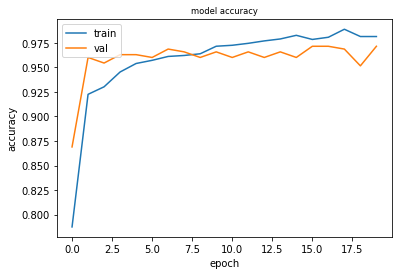

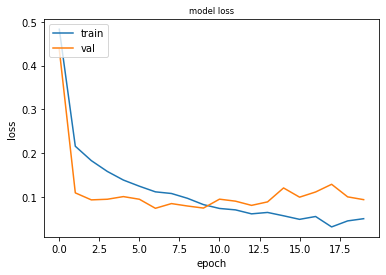

In [ ]:
history_dict = history.history
print(history_dict.keys())


def accuracy_plot(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

def loss_plot(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

accuracy_plot(history)
loss_plot(history)

In [ ]:
# model1 = keras.models.load_model('/content/drive/MyDrive/Colab_Notebooks/saved_checkpoints/best_model')

In [ ]:
model.evaluate(X_test, y_test)

46/46 [==============================] - 1s 23ms/step - loss: 0.1161 - accuracy: 0.9652


[0.1161484643816948, 0.9651639461517334]

46/46 [==============================] - 1s 19ms/step


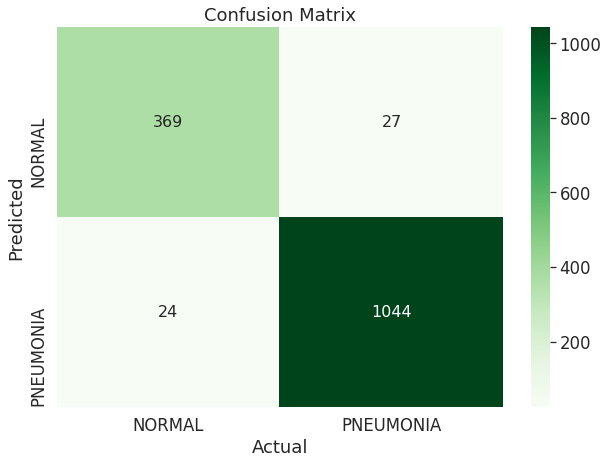

Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       396
           1       0.97      0.98      0.98      1068

    accuracy                           0.97      1464
   macro avg       0.96      0.95      0.96      1464
weighted avg       0.97      0.97      0.97      1464



In [ ]:
import pandas as pd 
from sklearn.metrics import classification_report,confusion_matrix

y_pred = np.argmax(model.predict((X_test), verbose=1), axis=-1)

def confusion_matrix_and_report(y_true, predictions_test):
    data = confusion_matrix(y_true, predictions_test)
    df = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
    df.index.name = 'Predicted'
    df.columns.name = 'Actual'
    plt.figure(figsize = (10,7))
    sns.set(font_scale=1.5)
    ax = sns.heatmap(df,cmap = 'Greens', annot=True,fmt = '.5g',annot_kws={"size": 16})# font size
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['NORMAL', 'PNEUMONIA']); ax.yaxis.set_ticklabels(['NORMAL', 'PNEUMONIA']);
    plt.show()
    return classification_report(y_true,predictions_test)


classification_report = confusion_matrix_and_report(y_test, y_pred)
print("Classification Report: ")
print(classification_report)